# 2. Base de données d’animaux

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Point 2)
     MSW05_Species  5-1_AdultBodyMass_g
0      dromedarius            492714.47
1          adustus             10392.49
2           aureus              9658.70
3          latrans             11989.10
4            lupus             31756.51
...            ...                  ...
5411       argurus                40.42
5412         maini                93.99
5413     palatilis               123.00
5414  pedunculatus               100.00
5415     woodwardi                95.02

[5416 rows x 2 columns]
# Point 3)
Valeur minimale : abae , -999.0
Valeur maximale : zyli , 154321304.5
Valeur moyenne  : 115940.09211964549
Valeur médiane  : 23.125


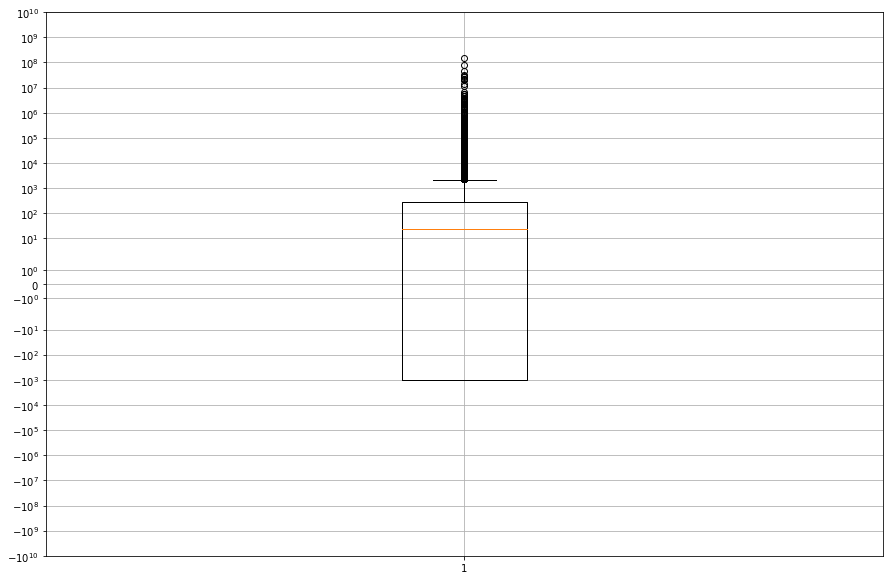

In [4]:
# 1)
df = pd.read_csv("csv/PanTHERIA_1-0_WR05_Aug2008.txt", sep='\t', lineterminator='\n')

# 2)
print("# Point 2)")
print(df[['MSW05_Species', '5-1_AdultBodyMass_g']])

# 3)
print("# Point 3)")
minVal = df[["5-1_AdultBodyMass_g", "MSW05_Species"]].min()
maxVal = df[["5-1_AdultBodyMass_g", "MSW05_Species"]].max()
print("Valeur minimale :", minVal["MSW05_Species"], "," , minVal['5-1_AdultBodyMass_g'])
print("Valeur maximale :", maxVal['MSW05_Species'], "," , maxVal['5-1_AdultBodyMass_g'])
print("Valeur moyenne  :", df["5-1_AdultBodyMass_g"].mean())
print("Valeur médiane  :", df["5-1_AdultBodyMass_g"].median())

# Oui il y a des valeurs aberrantes car -999g pour 

# Pour les valeurs aberrantes :
fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.boxplot(df['5-1_AdultBodyMass_g'])
axs.set_yscale('symlog')
plt.ylim([-1e10,1e10])
axs.grid()

(array([5.406e+03, 6.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-9.99000000e+02,  1.54312313e+07,  3.08634617e+07,  4.62956920e+07,
         6.17279224e+07,  7.71601528e+07,  9.25923831e+07,  1.08024613e+08,
         1.23456844e+08,  1.38889074e+08,  1.54321304e+08]),
 <BarContainer object of 10 artists>)

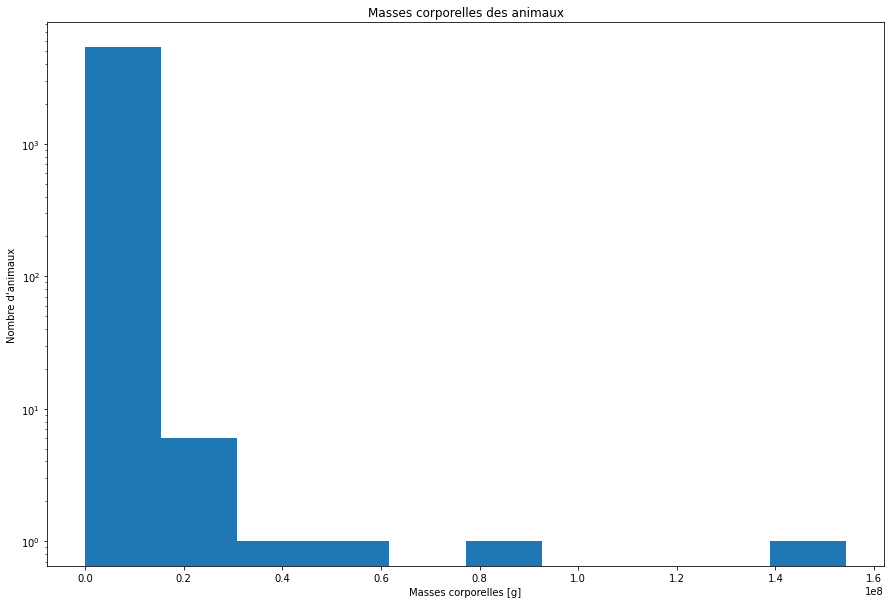

In [7]:
# 4)
fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.yscale('log')
axs.set_xlabel('Masses corporelles [g]')
axs.set_ylabel('Nombre d\'animaux') 
axs.set_title('Masses corporelles des animaux') 

axs.hist(df['5-1_AdultBodyMass_g'])

## Question 6

* Le plus part des animaux ont un poids qui va de 0.1g à 20t
* Certaines espèces plus rares ont un poids beaucoup plus élevé comme 90t ou 150t. Après quelques recherches, il ne s'agit pas de bruit mais bel bien de valeurs réelles.

(array([4778.,  190.,   73.,   36.,   17.,   19.,   13.,   12.,   13.,
          10.]),
 array([ -999.   ,  4100.899,  9200.798, 14300.697, 19400.596, 24500.495,
        29600.394, 34700.293, 39800.192, 44900.091, 49999.99 ]),
 <BarContainer object of 10 artists>)

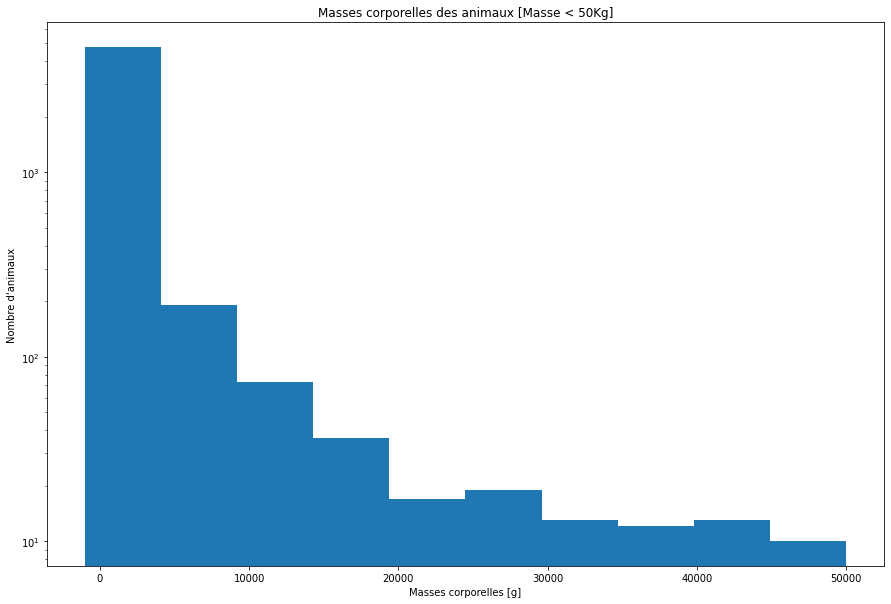

In [8]:
# 5)
fig, axs = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.yscale('log')

data = df[df['5-1_AdultBodyMass_g'] < 50000]

axs.set_xlabel('Masses corporelles [g]')
axs.set_ylabel('Nombre d\'animaux') 
axs.set_title('Masses corporelles des animaux [Masse < 50Kg]') 

axs.hist(data['5-1_AdultBodyMass_g'])

## Question 7

* Par rapport à l'histogramme précédent et en ayant moins de données nous voyons mieux les différences de poids entre animaux
* Grâce à ces données nous être plus précis et affirmer que la plus part des animaux ont un poids qui va de 0.1g à 5Kg. Ce résultat est donc beaucoup plus précis que celui donné précédemment.
* Cet histrogramme montre aussi que la base de données contient du bruit. En effet certaines masses corporelles ont des valeurs négatives ce qui est impossible

# 3. Loi de Benford

In [49]:
# 1)
filteredData = df[df['5-1_AdultBodyMass_g'] > 0]
print(data.head())

   5-1_AdultBodyMass_g
0            492714.47
1             10392.49
2              9658.70
3             11989.10
4             31756.51


In [17]:
# 2)
filteredData[["5-1_AdultBodyMass_g"]].mode()

,5-1_AdultBodyMass_g
0,40.0


Text(5, 5, 'test')

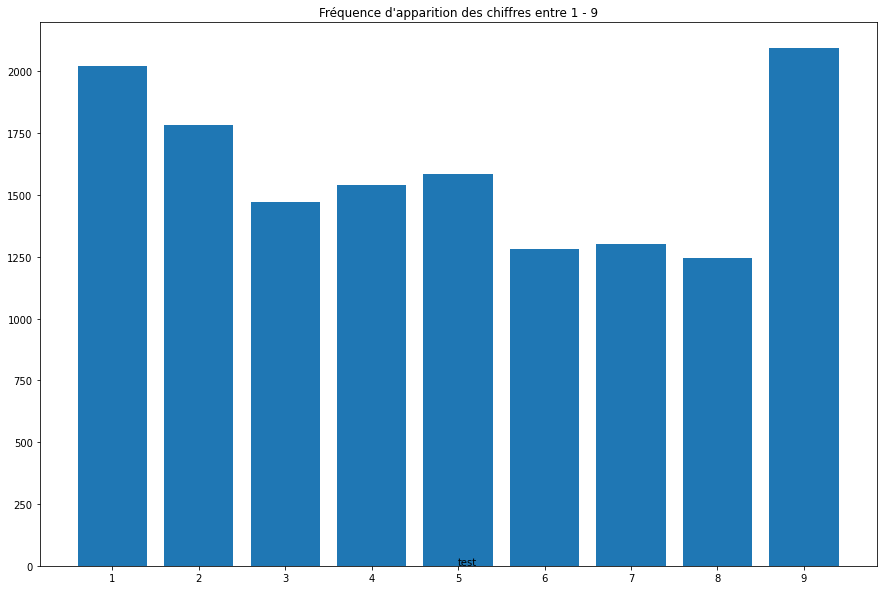

In [35]:
# 3)
frequency = {"1": 0, "2": 0, "3": 0, "4": 0, "5": 0, 
             "6": 0, "7": 0, "8": 0, "9": 0, "9": 0}

data = df[df['5-1_AdultBodyMass_g'] > 0]["5-1_AdultBodyMass_g"]

for digit in frequency :
    for mass in data:
        frequency[str(digit)] += str(mass).count(str(digit))
        
# 4)

fig, ax = plt.subplots()

x = range(1,10)
plt.rcParams['figure.figsize'] = [15, 10]
plt.xticks(x)
plt.title('Fréquence d\'apparition des chiffres entre 1 - 9')
ax = plt.bar(x, frequency.values())


plt.annotate(text="test",xy=[5,5])


## Question 8

Nous pouvons observer qu'il y a beaucoup plus d'occurences du chiffre 9 dans notre "bar chart" que d'après ce que la loi de Benford prédit. De plus il n'y a pas réellement de décroissance linéaire.